# PISA DATA EXPLORATION
## by Sinem Mutluer

## Preliminary Wrangling

> I used Pisa 2012 Data which provided by Udacity for this project. PISA is abbrevation of Programme for International Student Assessment. PISA is a worldwide study developed by the Organisation for Economic Co-operation and Development (OECD) which examines the skills of 15-year-old school students around the world. The study assesses students’ mathematics, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of education systems.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading dataset into a pandas dataframe

Pisa = pd.read_csv('pisa2012.csv', encoding= 'ISO-8859-1')

C:\Users\TT050776\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# First look at the data

Pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
# Creating new dataframe with the columns that will be used for analysis

pisa_new = Pisa.filter(['STIDSTD', 'CNT', 'OECD', 'ST04Q01', 'AGE','ST01Q01', 'PV1MATH', 'PV1READ', 'PV1SCIE', 'W_FSTUWT',
                        'GRADE','INTMAT', 'ST35Q06', 'ST55Q01', 'ST55Q02', 'ST55Q03', 'OUTHOURS', 'STUDREL', 'ST43Q04',
                       'ST87Q07', 'BELONG', 'ST46Q06', 'EC08Q01', 'EC08Q02', 'EC08Q03', 'EC08Q04', 'ST79Q07', 'IC10Q08', 
                        'IC10Q09', 'IC01Q04'])


# Renaming columns

pisa_final = pisa_new.rename(columns = {'STIDSTD' : 'Student ID','CNT' : 'Country', 'ST04Q01': 'Gender', 'AGE': 'Age',
                                        'ST01Q01': 'International Grade', 'PV1MATH': 'Math', 'PV1READ': 'Reading', 
                                        'PV1SCIE': 'Science', 'W_FSTUWT': 'Final Student Weight','GRADE': 'Comparison with Model Grade'
                                        ,'INTMAT': 'Math Interest', 'ST35Q06': 'Parents Like Math', 'ST55Q01': 'OofS_Lang',
                                        'ST55Q02': 'OofS_Math', 'ST55Q03': 'OofS_Science', 'OUTHOURS': 'OofS_Study Time', 
                                        'STUDREL': 'Teacher_Student Relationship', 'ST43Q04': 'Different_Teachers',
                                        'ST87Q07': 'Feel Happy at School', 'BELONG': 'Belonging to School', 'ST46Q06': 'Student no in lang. class', 
                                        'EC08Q01': 'Reading act._lang.', 'EC08Q02': 'Watching TV act._lang.', 
                                        'EC08Q03': 'Internet act._lang.', 'EC08Q04': 'Writing act._lang.',
                                        'ST79Q07': 'Small Groups', 'IC10Q08':'Homework', 'IC10Q09': 'Group Work', 'IC01Q04': 'Internet_Connection' })

In [5]:
#Looking at new data

pisa_final.head()

,Student ID,Country,OECD,Gender,Age,International Grade,Math,Reading,Science,Final Student Weight,...,Belonging to School,Student no in lang. class,Reading act._lang.,Watching TV act._lang.,Internet act._lang.,Writing act._lang.,Small Groups,Homework,Group Work,Internet_Connection
0,1,Albania,Non-OECD,Female,16.17,10,406.8469,249.5762,341.7009,8.9096,...,-1.18,Agree,NaN,NaN,NaN,NaN,Every Lesson,NaN,NaN,NaN
1,2,Albania,Non-OECD,Female,16.17,10,486.1427,406.2936,548.9929,8.9096,...,NaN,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Albania,Non-OECD,Female,15.58,9,533.2684,401.2100,499.6643,8.4871,...,NaN,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Albania,Non-OECD,Female,15.67,9,412.2215,547.3630,438.6796,8.4871,...,NaN,NaN,NaN,NaN,NaN,NaN,Every Lesson,NaN,NaN,NaN
4,5,Albania,Non-OECD,Female,15.50,9,381.9209,311.7707,361.5628,8.4871,...,2.63,Agree,NaN,NaN,NaN,NaN,Most Lessons,NaN,NaN,NaN


In [6]:
# Overview of data

pisa_final.info()
pisa_final.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 30 columns):
Student ID                      485490 non-null int64
Country                         485490 non-null object
OECD                            485490 non-null object
Gender                          485490 non-null object
Age                             485374 non-null float64
International Grade             485490 non-null int64
Math                            485490 non-null float64
Reading                         485490 non-null float64
Science                         485490 non-null float64
Final Student Weight            485490 non-null float64
Comparison with Model Grade     484617 non-null float64
Math Interest                   316708 non-null float64
Parents Like Math               313389 non-null object
OofS_Lang                       307761 non-null object
OofS_Math                       308171 non-null object
OofS_Science                    306090 non-null object
OofS

(485490, 30)

### What is the structure of your dataset?

> There are 485490 students in the dataset. There were 636 columns in the dataset and lots of them had detailed information that will not be used for this project so i removed them and create new dataframe just includes 30 columns.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in which variables have more affect on students' skills in positive way or negative way.I also want to look at from which countries students attended Pisa more and relation between skills.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think internet usage, teacher change, parents' influence on students and teaching type may affect students' skills. I also want to look at which gender is more tend to the skills.

## Univariate Exploration


> In this section, i will look at the distributions of individual variables.

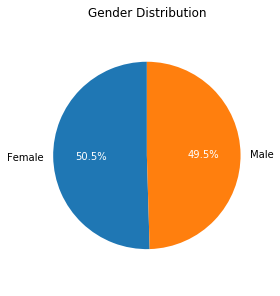

In [7]:
# Plotting gender to see the distributon

fig1, ax1 = plt.subplots(1, 1, figsize=(4, 4), sharex=True)
patches, texts, autotexts = ax1.pie(pisa_final.Gender.value_counts(), 
                                    labels=['Female','Male'],
                                    autopct='%1.1f%%',
                                    startangle=90
                                   );
    
for text in autotexts:
    text.set_color('white')
    
ax1.axis('equal');
plt.tight_layout();
plt.title('Gender Distribution')
plt.show();

> Female and male student counts are close to each other so it's possible to have a sensible analyze about gender. 

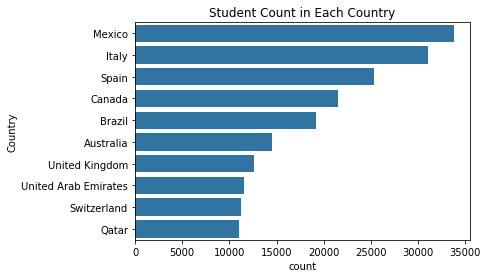

In [8]:
# Let's look at the country distribution of students

base_color = sb.color_palette()[0]
sb.countplot(data = pisa_final, y = 'Country', color = base_color, order=pisa_final['Country'].value_counts().index[:10])
plt.title('Student Count in Each Country')
plt.ylabel('Country');

> Mexico,Italy,Spain,Canada,Brazil have students over 15000.They have the biggest part of the data.

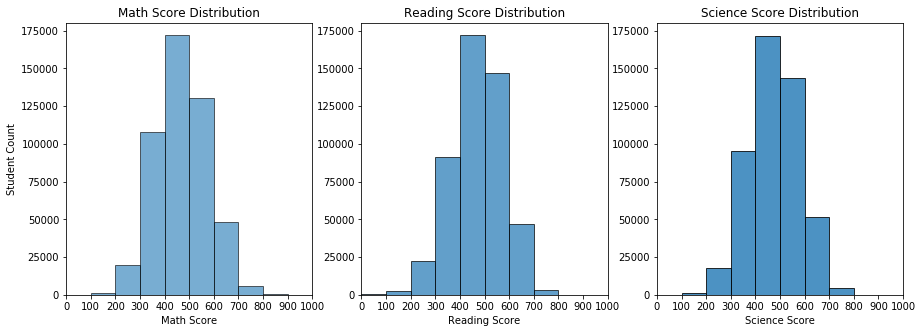

In [9]:
# Let' look at the skill scores distribution

plt.figure(figsize = [15, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(pisa_final['Math'], bins = bins_hist, ec = 'black', alpha = 0.60);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Student Count')
plt.title("Math Score Distribution");

plt.subplot(1, 3, 2)
plt.hist(pisa_final['Reading'], bins = bins_hist, ec = 'black', alpha = 0.70);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.title("Reading Score Distribution");

plt.subplot(1, 3, 3)
plt.hist(pisa_final['Science'], bins = bins_hist, ec = 'black', alpha = 0.80);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score')
plt.title("Science Score Distribution");

> - All scores have normal distribution.
- Lots of students have scores between 400 and 600. Genaral trend of scores for all the skills is between 300 - 700. 
- There are some students who have reading score under the point of 100 and math score over the point of 800.But the number of those students is low.

## Bivariate Exploration

> In this section, i will investigate relationships between pairs of variables in the
data.

Text(0.5, 1.0, 'Math Interest and Math Score Correlation')

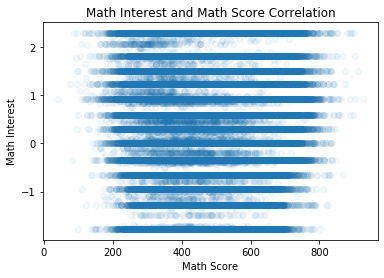

In [10]:
# Let's see is there any relationship with math interest and math score

plt.scatter( data= pisa_final, x= 'Math', y= 'Math Interest', alpha=1/20);
plt.xlabel('Math Score')
plt.ylabel('Math Interest')
plt.title('Math Interest and Math Score Correlation')

> There isn't exact relationship between Math Interest and Math Score. Even if students's interests is minus, they are able to get the score in general trend.

Text(0.5, 1.0, "Parents' Math Interest and Student Math Score Correlation")

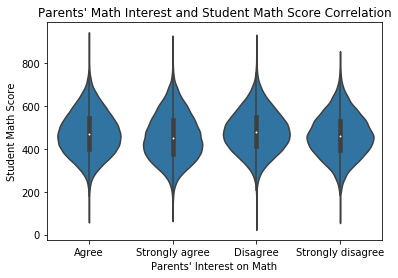

In [11]:
# Let's see is there any relationship with parents like math and student math score. 

# Values in parents like math column

Parents_Like_Math = ['Agree', 'Strongly agree', 'Disagree', 'Strongly disagree']

# Plotting the relationship

vinterest = pd.api.types.CategoricalDtype(ordered=True, categories= Parents_Like_Math)
pisa_final['Parents Like Math'] = pisa_final['Parents Like Math'].astype(vinterest);

sb.violinplot(data = pisa_final, x= 'Parents Like Math', y= 'Math', color=base_color);
plt.xlabel("Parents' Interest on Math")
plt.ylabel("Student Math Score" )
plt.title("Parents' Math Interest and Student Math Score Correlation")


> Looks like there is no strong relationship between student math socres with their parents' math interest. Students are able to be successful in math even if their parents don't know or don't like math. 

C:\Users\TT050776\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TT050776\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


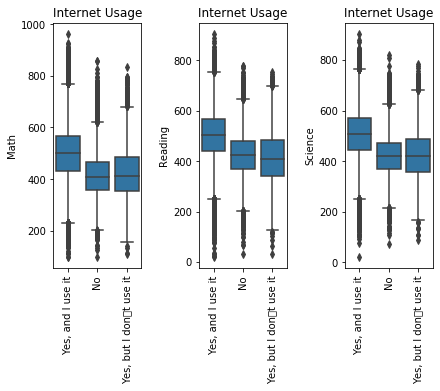

In [12]:
# Let's see is there any relationship between internet usage and student skills.

# Dropping nan rows from Internet Connection column

pisa_final['Internet_Connection'] = pisa_final['Internet_Connection'].fillna(0)
pisa_filtered = pisa_final[pisa_final['Internet_Connection'] != 0]

# Putting some space between graphs

fig, axes = plt.subplots(nrows=4, ncols=4)
fig.tight_layout() 

# Plotting Math

plt.subplot(1, 3, 1)
sb.boxplot( data= pisa_filtered, x='Internet_Connection', y= 'Math', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Internet Usage');

# Plotting Reading

plt.subplot(1, 3, 2)
sb.boxplot( data= pisa_filtered, x='Internet_Connection', y= 'Reading', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Internet Usage');

# Plotting Science

plt.subplot(1, 3, 3)
sb.boxplot( data= pisa_filtered, x='Internet_Connection', y= 'Science', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Internet Usage');



> Looks like internet usage have some affect on skills. We can say the students who use internet for research can get more points on all skills.

## Multivariate Exploration

> In this section, i will investigate three or more variables.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 3600x1440 with 0 Axes>

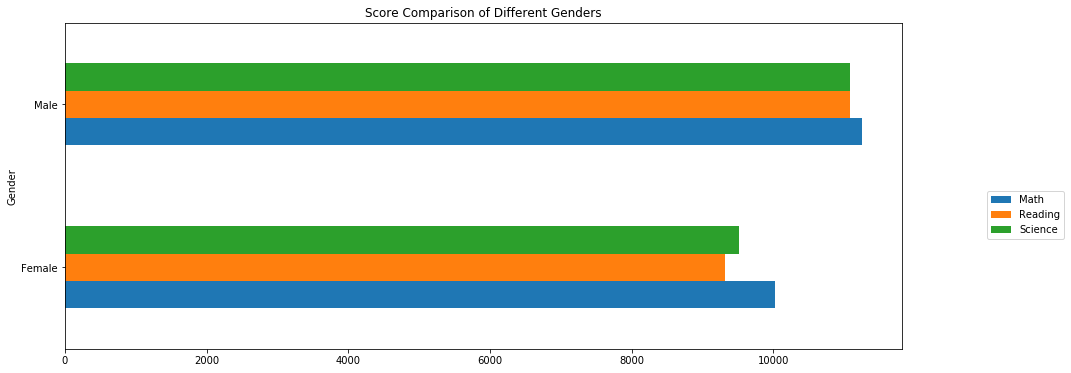

In [14]:
# Let's see which gender is more tend to the skills.

plt.figure(figsize = [50, 20])
res = pisa_final.groupby(['Gender']).var()[['Math', 'Reading', 'Science']]
ax = res.plot.barh(figsize=(15,6));
ax.legend(bbox_to_anchor=(1.2, 0.5))
plt.title('Score Comparison of Different Genders')
plt.xticks(rotation='horizontal')

> Looks like male students more succesful on all skills.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text xticklabel objects>)

<Figure size 3600x1440 with 0 Axes>

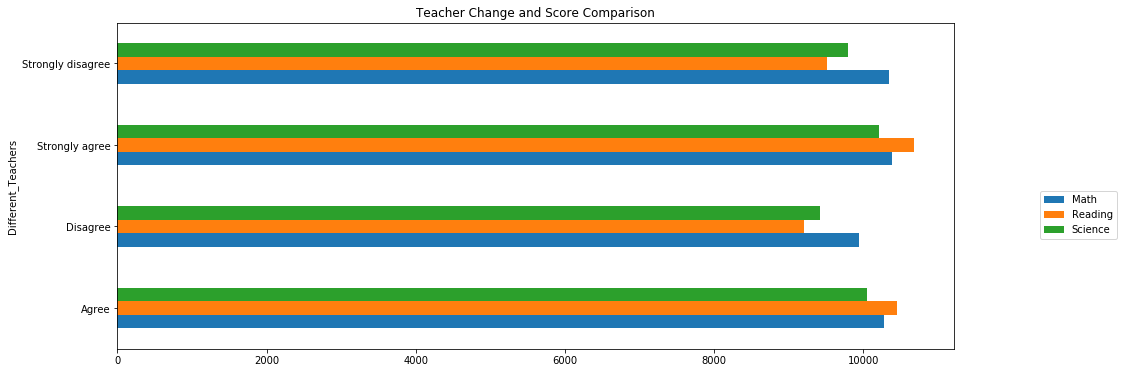

In [15]:
# Let's see if teacher change has an effect on student scores.

pisa_final['Different_Teachers'] = pisa_final['Different_Teachers'].fillna(0)
pisa_filtered1 = pisa_final[pisa_final['Different_Teachers'] != 0]

# Plotting

plt.figure(figsize = [50, 20])
res = pisa_filtered1.groupby(['Different_Teachers']).var()[['Math', 'Reading', 'Science']]
ax = res.plot.barh(figsize=(15,6));
ax.legend(bbox_to_anchor=(1.2, 0.5))
plt.title('Teacher Change and Score Comparison')
plt.xticks(rotation='horizontal')

> We can't exactly say that teacher change have an affect on math score. But when it comes to science and reading, we can see that if theacher changes, scores go over. We can say that math has more standart parameters while teaching. Science may differ from math about perspective. Different teachers might show different ways of perspective. For reading, interaction with different people makes learning more easy so if teacher changes, interaction increases.

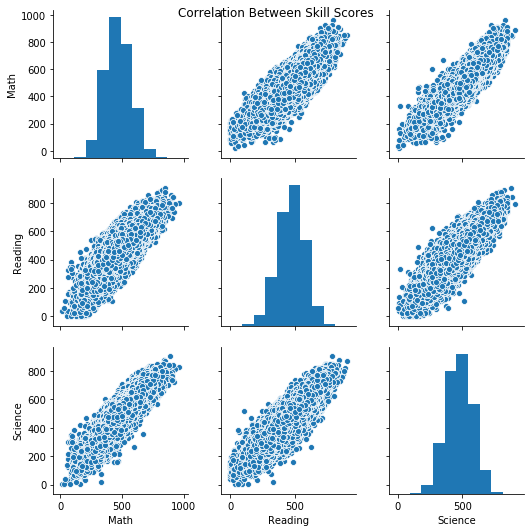

In [16]:
# Let's see correlation between scores of skills.

pair_plot = sb.pairplot(data = pisa_final, vars=["Math", "Reading", "Science"]);
pair_plot.fig.suptitle("Correlation Between Skill Scores");

> Looks like there is a strong positive correlation between skills. We can say that each skill are related to each other somehow.

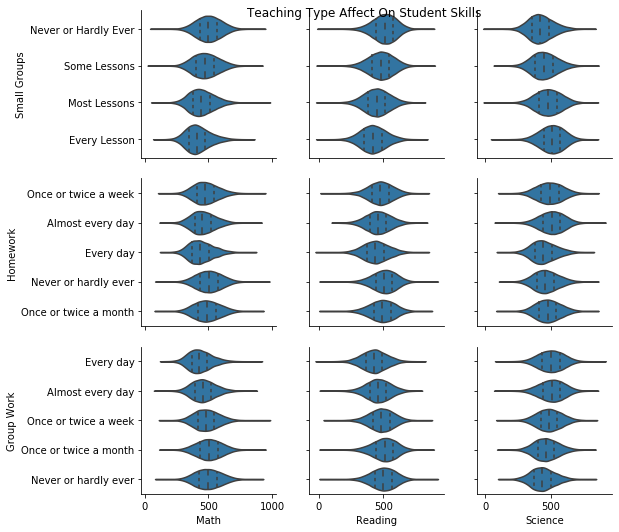

In [17]:
# Let's look at teaching type affect on student skills.

g = sb.PairGrid( data= pisa_final, x_vars = ['Math', 'Reading', 'Science'], 
                y_vars = ['Small Groups', 'Homework', 'Group Work']) 

g.map(sb.violinplot, inner = 'quartile')

g.fig.suptitle("Teaching Type Affect On Student Skills");

> According to the charts;
- Math scores are better when students study individual. Students learn math more when they are in the class. 
- Work with groups doesn't the best way to improve reading skill. Homeworks may create good affect on skills if they are not given by teachers very frequently.
- Both small group and large group works are very useful for science. Homeworks also increase their skills if they are not given every day. Everyone needs break sometimes.